# Custom Vision model to detect swimming pools from aerial images
<img src="animatedgif.gif" width=800>

## Azure Custom Vision overview

<img src="azurecv.jpg">

# 2. Azure Custom Vision

In [1]:
#!pip install pylabel > /dev/null

In [2]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
from pylabel import importer
import os
from pathlib import PurePath
from os.path import exists
from decimal import *
import datetime
import glob

## 2.1. Import VOC annotations 

In [3]:
for root, _, files in os.walk('images/'):
    print("Directory:", root, "=", len(files), "files")

Directory: images/ = 4 files
Directory: images/train = 0 files
Directory: images/train/CANNES_TILES_512x512_labels = 0 files
Directory: images/train/CANNES_TILES_512x512_png = 0 files
Directory: images/train/labels = 1224 files
Directory: images/train/png = 2401 files


In [4]:
path_to_annotations = "images/train/labels/"
path_to_images = "../png/"

### We are going to use pylabel for importing the VOC annotated files

In [5]:
dataset = importer.ImportVOC(path = path_to_annotations, 
                             path_to_images = path_to_images, 
                             name = "swimmingpool")

In [6]:
for root, _, files in os.walk('images/train/png/'):
    print("Directory:", root, "=", len(files), "files")

Directory: images/train/png/ = 2401 files


In [7]:
# The existing labeled files mentions the images with the tif extension but we have only png files.
# So we can change that by renaming the extension of the images from .png to .tif

for img in glob.glob("images/train/png" + "/*.png"):
    file = os.path.splitext(img)[0]
    os.rename(img, file + '.tif')

In [39]:
# Removing some empty dir
os.rmdir('images/train/CANNES_TILES_512x512_labels')
os.rmdir('images/train/CANNES_TILES_512x512_png')

### Let's display some images using an index or a filename

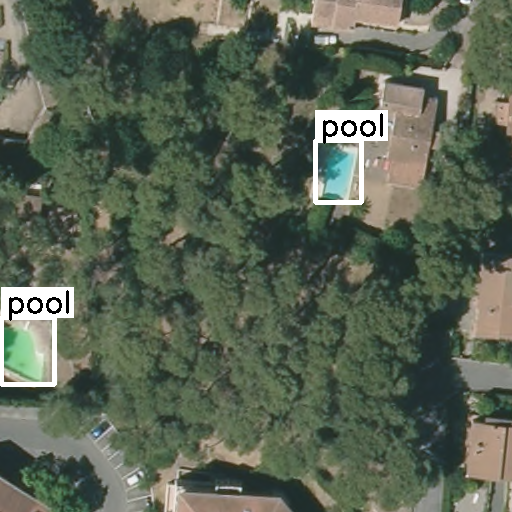

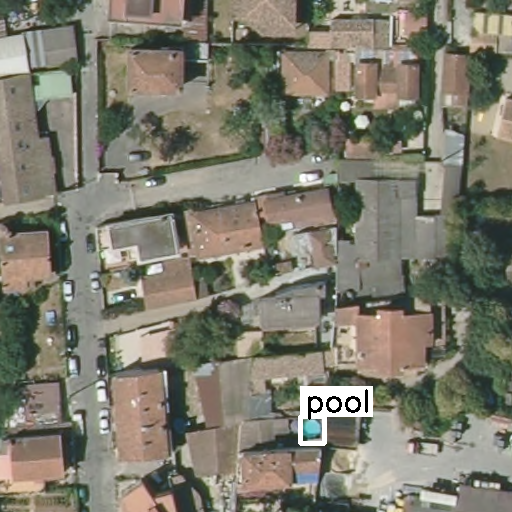

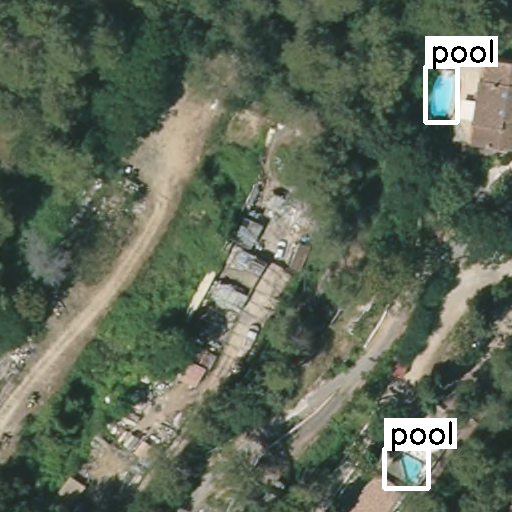

In [17]:
from IPython.display import display
display(dataset.visualize.ShowBoundingBoxes(1))
display(dataset.visualize.ShowBoundingBoxes(10))
display(dataset.visualize.ShowBoundingBoxes(20))

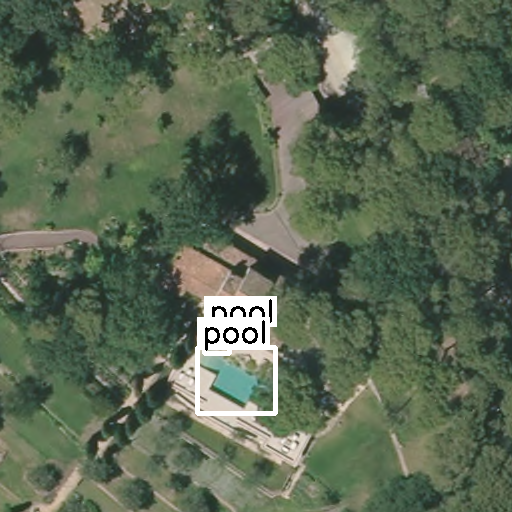

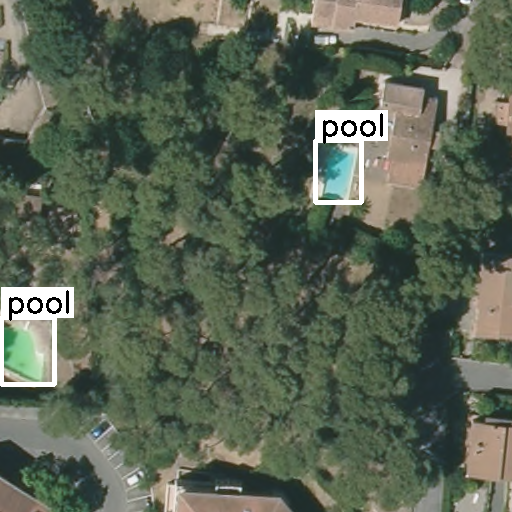

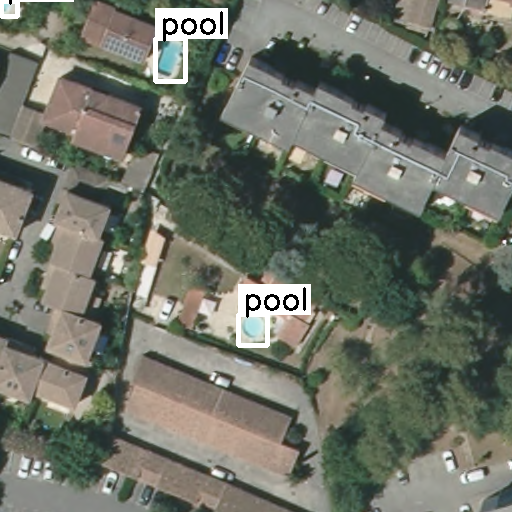

In [18]:
from IPython.display import display
display(dataset.visualize.ShowBoundingBoxes("CANNES_TILES_512x512.10.tif"))
display(dataset.visualize.ShowBoundingBoxes("CANNES_TILES_512x512.1000.tif"))
display(dataset.visualize.ShowBoundingBoxes("CANNES_TILES_512x512.1005.tif"))

## 2.2 Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [19]:
df = dataset.df
df.head(10)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,../png/,CANNES_TILES_512x512.10.tif,NaN,0,512,512,3,0,204.0,326.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
1,../png/,CANNES_TILES_512x512.10.tif,NaN,0,512,512,3,0,197.0,347.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
2,../png/,CANNES_TILES_512x512.1000.tif,NaN,1,512,512,3,0,315.0,140.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
3,../png/,CANNES_TILES_512x512.1000.tif,NaN,1,512,512,3,0,1.0,317.0,...,NaN,NaN,Unspecified,1,0,0,pool,NaN,,1
4,../png/,CANNES_TILES_512x512.1001.tif,NaN,2,512,512,3,0,95.0,246.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
5,../png/,CANNES_TILES_512x512.1004.tif,NaN,3,512,512,3,0,158.0,444.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
6,../png/,CANNES_TILES_512x512.1005.tif,NaN,4,512,512,3,0,238.0,314.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
7,../png/,CANNES_TILES_512x512.1005.tif,NaN,4,512,512,3,0,155.0,38.0,...,NaN,NaN,Unspecified,0,0,0,pool,NaN,,1
8,../png/,CANNES_TILES_512x512.1005.tif,NaN,4,512,512,3,0,1.0,1.0,...,NaN,NaN,Unspecified,1,0,0,pool,NaN,,1


In [20]:
df.shape

(3197, 25)

In [21]:
df.columns

Index(['img_folder', 'img_filename', 'img_path', 'img_id', 'img_width',
       'img_height', 'img_depth', 'ann_segmented', 'ann_bbox_xmin',
       'ann_bbox_ymin', 'ann_bbox_xmax', 'ann_bbox_ymax', 'ann_bbox_width',
       'ann_bbox_height', 'ann_area', 'ann_segmentation', 'ann_iscrowd',
       'ann_pose', 'ann_truncated', 'ann_difficult', 'cat_id', 'cat_name',
       'cat_supercategory', 'split', 'annotated'],
      dtype='object')

In [23]:
print(f"Number of images: {dataset.analyze.num_images}")

Number of images: 1224


In [24]:
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")

Number of classes: 1
Classes:['pool']


In [25]:
print(f"Class counts:\n{dataset.analyze.class_counts}")

Class counts:
pool    3197
Name: cat_name, dtype: int64


## 2.3. Export to COCO JSON (optional)
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [26]:
dataset.export.ExportToCoco()

['images/train/labels/swimmingpool.json']

## 2.4. Azure Custom Vision

www.customvision.ai

Documentation: https://docs.microsoft.com/en-us/azure/cognitive-services/custom-vision-service/

You need to specify your Azure Custom Vision credentials below:

In [27]:
# Azure Custom Vision
ENDPOINT = "TOBEREPLACED" # Endpoint of the Azure CV service
training_key = "TOBEREPLACED" # Your training key
prediction_key = "TOBEREPLACED" # Your prediction key
prediction_resource_id = "TOBEREPLACED"

In [28]:
# Initialize objects used by Azure Custom vision
credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(ENDPOINT, credentials)
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [29]:
# Azure Custom Vision informations
project_name = 'SwimmingPoolDetection'

In [30]:
print("We are going to create the Azure Custom Vision project:", project_name)

We are going to create the Azure Custom Vision project: SwimmingPoolDetection


In [31]:
# Create a new project for object detection using the General domain
obj_detection_domain = next(domain for domain in trainer.get_domains() \
                            if domain.type == "ObjectDetection" and domain.name == "General")
project = trainer.create_project(project_name, domain_id=obj_detection_domain.id)

In [32]:
# Class to predict
print(dataset.analyze.classes)

['pool']


In [33]:
# Create a tag for each class and store then in a dict where the class name is the key
tags = {}

for class_name in dataset.analyze.classes:
    tag = trainer.create_tag(project.id, class_name)
    tags[class_name] = tag

## 2.5 Loading the images into Azure Custom Vision

In [34]:
# Iterate the rows for each image in the dataframe
t1 = datetime.datetime.now()
nb = 0

print(t1, "Starting to load the images & labels into the Azure Custom Vision project:", project_name)

for img_filename, img_df in dataset.df.groupby('img_filename'):
    img_path = str(PurePath(dataset.path_to_annotations, str(img_df.iloc[0].img_folder), img_filename))
    assert exists(img_path), f"File does not exist: {img_path}"

    # Create a region object for each bounding box in the dataset 
    regions = []
    for index, row in img_df.iterrows():

        # Normalize the boundings box coordinates between 0 and 1
        x = Decimal(row.ann_bbox_xmin / row.img_width).min(1)
        y = Decimal(row.ann_bbox_ymin / row.img_height).min(1)
        w = Decimal(row.ann_bbox_width / row.img_width).min(1-x)
        h = Decimal(row.ann_bbox_height / row.img_height).min(1-y)
        
        regions.append(Region(
                tag_id=tags[row.cat_name].id, 
                left=x,
                top=y,
                width=w,
                height=h
            )
        )

    # Create an object with the image and all of the annotations for that image
    with open(img_path, mode="rb") as image_contents:
        image_and_annotations = [ImageFileCreateEntry(name=img_filename, 
                                                      contents=image_contents.read(), 
                                                      regions=regions)]

    # Upload the image and all annnotations for that image
    upload_result = trainer.create_images_from_files(
            project.id, 
            ImageFileCreateBatch(images=image_and_annotations)
        )
    
    # If upload is not successful, print details about that image for debugging 
    if not upload_result.is_batch_successful:
        print("Image upload failed.")
        for image in upload_result.images:
            print(img_path)
            print("Image status: ", image.status)
            print(regions)
    
    nb += 1

print("\nNumber of processed files =", nb - 1)
print()
print(datetime.datetime.now(), "Done in:", datetime.datetime.now() - t1)

2022-02-17 11:04:12.071186 Starting to load the images & labels into the Azure Custom Vision project: SwimmingPoolDetection

Number of processed files = 1223

2022-02-17 11:12:49.449013 Done in: 0:08:37.377833


> You can go to customvision.ai to see the project with the images and the labels and train the model www.customvision.ai

<img src='capture1.jpg'>

You can see that all the images and the labels have been directly imported to Azure Custom Vision. So no need to label the images.

<img src='capture2.jpg'>
<img src='capture21.jpg'>

We can now train the model using first the **Quick Training** mode and then the **Advanced Training** mode in order to improve the results.

<img src='capture3.jpg'>

Model has been trained

<img src="capture4.jpg">

Then you can deploy the model. The next notebook will show how to call the deployed model using Python.